# Heart Diseases Classification and Analysis
**Heart Diseases** is broad term it includes the many heart related diseses like **chest pain**, **abnormal heart beat**, **heart attack** etc.
**Heart Diseases** cuased by many reason like **abnormal heart beat**, **weak heart muscle**, **heart infection**.

#### Steps to Classify Heat Diseases
- Load Data
- Data Analysis
- Model Selection
        1. Models
            a. Logistic Regression
            b. K-Nearest Neighbour
            c. Gaussian Naive Bayes
            d. Decision tree
            e. Support Vector Machine
        2. Cross Validaiton
        3. Hyper Parameter Tuning of Top Accuarate models
        4. Select Best Model
- Refernece for information

### Load Data

In [1]:
# Import Packages
import numpy as np    # Numeric Library
import pandas as pd     # Data Analysis Library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading heart diseases
heart_df = pd.read_csv("/kaggle/input/heart.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Analysis
> Lets inspect and analyse the heart disease data

In [3]:
import matplotlib.pyplot as plt    #Visualization Library
import seaborn as sns    # Advanced Visualization Library
sns.set()

%matplotlib inline

- Creating named dictorionries to analyse the data.

In [4]:
# Sex Dictionary
sex_dict = { 0: 'Female',1: 'Male' }

# Chest Pain Dictionary
chest_pain_dict = { 0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal Pain', 3:'Asymptomatic'}

# Blood Sugar  Dictionary
fbs_dict = { 0: 'No Blood Sugar', 1: 'Blood Sugar'}

# Rest ECG
restecg_dict = { 0:'Normal restecg', 1:'ST-T wave abnormality restecg', 2:'ventricular hypertrophy restecg'}

# Exercise Induced Angina
exang_dict = { 0:'Exang No', 1:'Exang Yes'}

# Slope of the peak exercise ST segment 
slope_dict = { 0:'Upsloping', 1:'flat', 2:'Downsloping'}

# Number of Major Vessels (0-3) Colored by Flourosopy
ca_dict = { 0:'Major vessel 0', 1:'Major vessel 1', 2:'Major vessel 2', 3:'Major vessel 3', 4:'Major vessel 4'}

# Thalassemia Dictionary

thal_dict = { 0: 'None', 1: 'Normal', 2:'Fixed Defect',3:'Reversable Defect'}

# Target Dictionary
target_dict = { 0: 'Not Present', 1: 'Present'}

Creating and Applying Label Dictionaries in New DataFrame with New Column Name for better understanding.


In [5]:
# Creating new DataFrame
df = heart_df[['age']]
# trestbps as Resting Blood Pressure
df['Resting Blood Pressure'] = heart_df['trestbps']
# chol as Serum Cholestoral
df['Serum Cholestoral'] = heart_df['chol']
# thalach as Max. Heart Rate
df['Max. Heart Rate'] = heart_df['thalach']
# old peak ST Depression
df['ST Depression'] = heart_df['oldpeak']
# sex as Sex
df['Sex'] = heart_df['sex'].apply(lambda x:sex_dict[x])
# thal as Thalassemia
df['Thalassemia'] = heart_df['thal'].apply(lambda x:thal_dict[x])
# fbs as Thalassemia
df['Fasting Blood Sugar'] = heart_df['fbs'].apply(lambda x:fbs_dict[x])
# cp as Chest Pain
df['Chest Pain'] = heart_df['cp'].apply(lambda x:chest_pain_dict[x])
# target as Heart Disease
df['Heart Disease'] = heart_df['target'].apply(lambda x:target_dict[x])

> Lets create common function to plot chart.

In [6]:
def custom_count_barplot(df, col, col_val, gp_val, gp_key):
    # Getting groupby on gp_val by gp_key
    new_df = df[df[col]==col_val].groupby([gp_val,gp_key])[gp_key].count()
    
    # Ploting Bar chart
    ax = new_df.unstack().plot(kind='bar', fontsize=14, figsize=(14,5))
    ax.set_title('{0} with {1}'.format(col_val,gp_key), fontsize=18)
    ax.set_xlabel(gp_val,labelpad=10, fontsize=14)
    ax.set_ylabel('Count',fontsize=14)
    ax.legend(fontsize=12)
    ax.tick_params(labelrotation=0)
    
    # Annoting counts on the plot
    for patch in ax.patches:
        left, bottom, width, height = patch.get_bbox().bounds
        ax.annotate("{0}".format(int(height)), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
    plt.show()

#### Chest Pain Analysis
- Typical Angina: The presence of substernal chest pain or discomfort that was provoked by emotional stress and was gone by rest.
- Atypical Angina: The presence of most of the typical angina categories
- Non-Anginal: The presence of 1 or 2 type of typical angna
- Asymptomatic: Asymptomatic means neither causing nor exhibiting symptoms of disease.

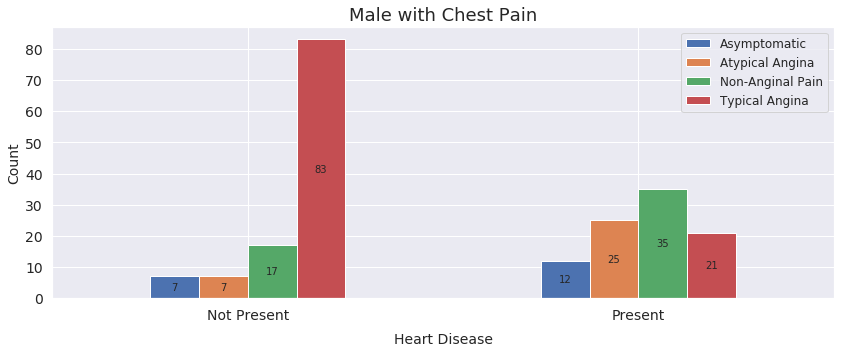

In [7]:
custom_count_barplot(df=df,col='Sex',col_val='Male',gp_val='Heart Disease',gp_key='Chest Pain')

- Male with Non-Anginal chest pain (as per data) mostly have Heart Disease.
- Male with Typical Angina chest pain (as per data) mostly don't have Heart Disease.

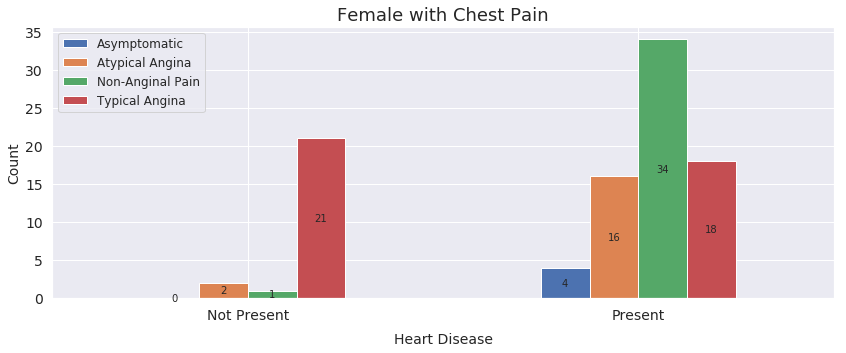

In [8]:
custom_count_barplot(df=df,col='Sex',col_val='Female',gp_val='Heart Disease',gp_key='Chest Pain')

- Female with Non-Anginal chest pain (as per data) mostly have Heart Disease.

#### Thalassemia Analysis
Thalassemia is a blood disorder in which body makes inadequate amount of hemoglobin proteins.

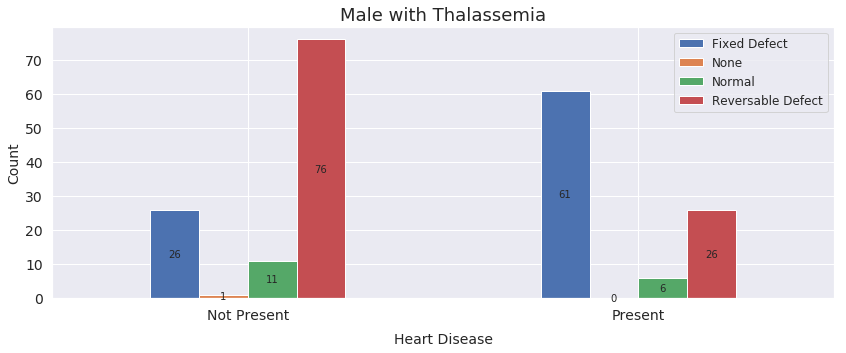

In [9]:
custom_count_barplot(df=df,col='Sex',col_val='Male',gp_val='Heart Disease',gp_key='Thalassemia')

- Male with fixed defect mostly have Heart Disease
- With reversable defect mostly Heart Disease not present

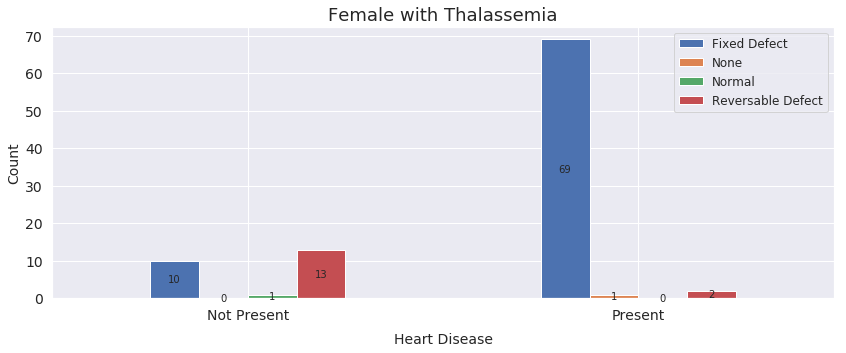

In [10]:
custom_count_barplot(df=df,col='Sex',col_val='Female',gp_val='Heart Disease',gp_key='Thalassemia')

- Female also with fixed defect mostly have Heart Disease

#### Fasting Blood Sugar Analyis

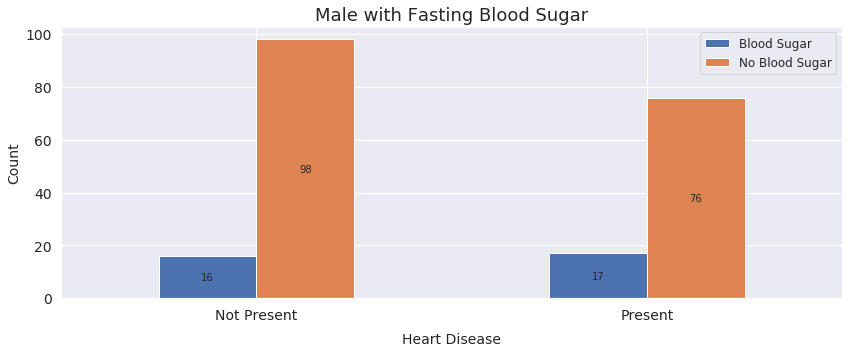

In [11]:
custom_count_barplot(df=df,col='Sex',col_val='Male',gp_val='Heart Disease',gp_key='Fasting Blood Sugar')

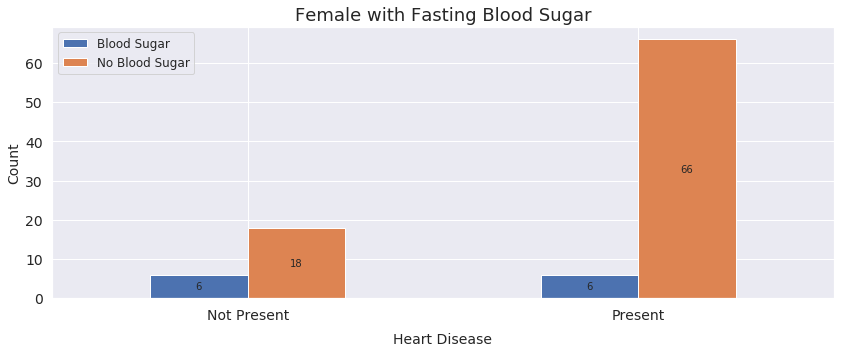

In [12]:
custom_count_barplot(df=df,col='Sex',col_val='Female',gp_val='Heart Disease',gp_key='Fasting Blood Sugar')

- Patient with Heart Disease mostly have Sugar.

#### Agewise Analysis

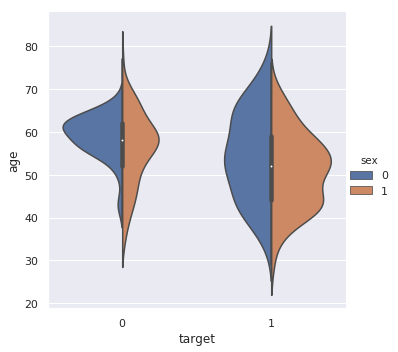

In [13]:
sns.catplot(x="target", y="age", hue="sex", kind="violin", split=True, data=heart_df);
plt.show()

- People within range of 40 years to 70 years heart Disease is present.

#### Data Preparation
Preparin data for classification. Droping unwanted data and creating new features.

In [14]:
# Feature
feature = heart_df.drop(['target','age','trestbps','chol','thalach','oldpeak'], axis=1)
# Labels
label = heart_df[['target']]

In [15]:
# Categories as Features i.e. Dummies of data
def get_dummies_concated(df,key,column_dict):
    tmp = pd.get_dummies(df[key])
    tmp.columns = column_dict.values()
    return pd.concat([df.drop(key, axis=1), tmp], axis=1)

col_resp_dict = {
    'sex':sex_dict,
    'cp':chest_pain_dict,
    'fbs':fbs_dict,
    'restecg':restecg_dict,
    'exang':exang_dict,
    'slope':slope_dict,
    'ca':ca_dict,
    'thal':thal_dict
}
# Applying above dictionary
for key,value in col_resp_dict.items():
    new_featue = get_dummies_concated(feature,key,value)

In [16]:
# Sacling the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(new_featue)
feature_scale = sc.transform(new_featue)

In [17]:
# Splitting Train Test in Ratio 75:25
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(new_featue, label, test_size=0.25)

In [18]:
# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
models = []
models.append(('LGR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVC',SVC()))

In [20]:
# Finding best model using cross validation
from sklearn.model_selection import cross_val_score

accuray_list = []
name_list = []

for name, model in models:
    
    accuray = cross_val_score(model, X_train, Y_train, scoring='accuracy' )

    name_list.append(name)
    accuray_list.append(accuray)
    
    print("Model: '{0}' | Accurcy: {1:.2f}%".format(name, accuray.mean()*100))

Model: 'LGR' | Accurcy: 82.38%
Model: 'KNN' | Accurcy: 85.03%
Model: 'GNB' | Accurcy: 62.23%
Model: 'DT' | Accurcy: 80.59%
Model: 'SVC' | Accurcy: 82.36%


Support Vector Machine is best for fitting above data

#### Hyper Parameter Tuning

In [21]:
# Svm depend on C and gamma
svc_param = {
    "C":[0.1,1,10,100,200],
    "gamma":[0.01,0.1,1,10,100]
}

In [22]:
# Using Grid Search for Para meter tuning
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(),param_grid=svc_param).fit(X_train,Y_train)
clf.best_params_ 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 10, 'gamma': 0.1}

In [23]:
cv = SVC(C=1,gamma=0.1).fit(X_train,Y_train)
print(cv.score(X_train,Y_train))
print(cv.score(X_test,Y_test))

0.8766519823788547
0.7894736842105263


Reference for theoretical information:
- https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
- https://www.timeofcare.com/typical-vs-atypical-chest-pain/
- http://www.ilpi.com/msds/ref/asymptomatic.html
- https://medlineplus.gov/ency/article/000587.htm